# Earth Observation Search & Visualization Tutorial

**Tutorial:** This tutorial covers techniques in the search and display of satellite imagery of RADARSAT-1 & RCM with the EODMS REST API<br>
**Mission & Instrument:** RADARSAT-1 & RADARSAT Constellation Mission (RCM)<br>
**Astronomical Target:** Earth Observation<br>
**Data:** Satellite Imagery from EODMS<br>
**Primary Tools:** ipywidgets, ipyleaflet, EODMS REST API (RAPI)<br>
**System Requirements:** Minimum 4 GB RAM<br>
**Tutorial Level:** Intermediate<br> 

### Imports

- [EODMS RAPI](https://py-eodms-rapi.readthedocs.io/en/latest/search-rapi.html): A REST API client for creating search queries for EODMS.
- [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/): A library for creating interactive maps in Jupyter Notebooks based on the popular JavaScript library Leaflet. 
- [ipywidgets](https://ipywidgets.readthedocs.io/en/7.7.0/): A library for creating interactive buttons and widgets in Jupyter Notebooks. 
- [Pandas](https://pandas.pydata.org/): A popular data analysis and manipulation library.

## Background Information 

RADARSAT-1 provided Canada and the world with an advanced synthetic aperture radar (SAR) platform capable of acquiring images of the Earth through a variety of conditions including cloud cover, smoke, haze, during day and at night. This powerful satellite imagery was invaluable in numerous applications including environmental monitoring, ice observation, agriculture, and more! This information also proved useful in disaster management such as floods, earthquakes, forest fires and even oil spills.<br>

The RADARSAT Constellation Mission (RCM) was the next generation of the RADARSAT Program, offering improved quality, quantity and coverage of 90% of Earth’s surface. This was accomplished by offering three satellites that were evenly spaced on the same orbital altitude of 600km.<br>

With RCM expected to take approximately 250,000 images per year, and RADARSAT-1 capturing over 710,000 publically available images over its lifetime, a robust data management system is required to distribute this data. This service is provided by the Earth Observation Data Management System (EODMS) managed by Natural Resources Canada (NRCan). This service provides the ability to search and download a variety of imagery products. This tutorial will look to use this service through its accompanying REST API to search and display satellite imagery from RARDARSAT-1 and RCM on an interactive map.<br><br>

## EODMS Account Creation and Initialization

To use the EODMS RAPI, an account is required. This can be done by following this [link](https://www.eodms-sgdot.nrcan-rncan.gc.ca/index-en.html) and selecting register. Once an account has been created, please replace your username and password in the accompanying credentials file associated with this tutorial. 


In [1]:
from eodms_rapi import EODMSRAPI

# external file for credentials
file = open('C:/Users/User/Desktop/nasashit/credentials.txt')
temp = file.read().splitlines()

rapi = EODMSRAPI(temp[0], temp[1])

### EODMS Search Template

EODMS offers a couple different tools to access their service, including a [command line interface (CLI)](https://github.com/eodms-sgdot/eodms-cli), a [web-browser interface](https://www.eodms-sgdot.nrcan-rncan.gc.ca/index-en.html) and the [python compatible RAPI](https://github.com/eodms-sgdot/py-eodms-rapi). Using this library, we will develop the general structure for creating search queries for EODMS.

In [2]:
def eodms_search(user, password, collection, features, filters = {}, dates = [], max_results = 1): 
    
    # using a username and password, initializes a connection to EODMS
    rapi = EODMSRAPI(user, password)
    
    # available options for EDOMS search
    rapi.search(collection, filters = filters, features = features, 
                dates = dates, max_results = max_results)
    
    raw_res = rapi.get_results('full')
    results = raw_res
    
    
    return results

### EODMS Filter List

As can be seen above, there are several parameters that can be specified when executing a search with EODMS. This includes search criteria such as the date, geometric features, data filters, and the collection. In the course of this tutorial, we will cover each of these filters in-detail and develop associated widgets through the ipywidgets library to interact with these filters. 

#### EODMS Collection

This begins with the collection parameter. This parameter specifies which satellite mission or aerial photos to be searched. The list of available collections can be determined using the following command. 

In [3]:
print(rapi.get_collections(as_list=True))

| EODMSRAPI | 2025-10-01 01:38:23 | Getting Collection information, please wait...
['NAPL', 'SGBAirPhotos', 'RCMImageProducts', 'Radarsat1', 'Radarsat1RawProducts', 'Radarsat-2_Tropical_Rain_Forest_Products', 'Radarsat2RawProducts']


As described at the start of the tutorial, we will be using the RADARSAT-1 and RCM image products. More information on the [National Air Photo Library (NAPL)](https://www.nrcan.gc.ca/maps-tools-and-publications/satellite-imagery-and-air-photos/air-photos/national-air-photo-library/9265) and [RADARSAT-2](https://www.asc-csa.gc.ca/eng/satellites/radarsat2/) can be found with their respective links.<br> 

As we have a list of options available, and we want users to only select a single option, a radio button is a [good choice](https://designsystem.digital.gov/components/radio-buttons/) for this particular widget. This can be created with the following.


In [4]:
import ipywidgets as widgets

# creates an instance of a radio button through the ipywidgets library
search_collection = widgets.RadioButtons(
    options=['Radarsat-1', 'RCM Images', 'Radarsat-1 & RCM'],
    description='Collection:',
    disabled=False
)

search_collection

RadioButtons(description='Collection:', options=('Radarsat-1', 'RCM Images', 'Radarsat-1 & RCM'), value='Radar…

Widgets from the ipywidget library have many helpful attributes and methods available. A helpful attribute in our context is the value of the widget that can be accessed as follows. 

In [5]:
search_collection.value

'Radarsat-1'

### EODMS Search Filters

Next, we will focus on the available filters for EODMS. These filters are different for each collection, and specify the majority of available options when querying a search with EODMS. These options include several important filters including items such as the sensor mode or configuration, the type of polarization used the satellites position and more.<br>

We can generate a full list of the available search filters using the following command. 

In [6]:
print(rapi.get_available_fields('Radarsat1', name_type='title')['search'])

['Orbit Direction', 'Open Data', 'Client Order Number', 'Order Key', 'Product Format', 'Product Id', 'Product Orientation', 'Sampled Pixel Spacing (Panchromatic)', 'Catalog Visibility Start', 'Collection Id', 'Creation Date', 'Loading Status', 'Owner Id', 'Public Good', 'Subcollection Id', 'Sequence Id', 'Start Date', 'Status', 'End Date', 'UUID', 'Processing Level', 'Look Orientation', 'Beam Id', 'Position', 'Dataset Id', 'Image Id', 'Incidence Angle', 'Absolute Orbit', 'Receive Polarization', 'Sensor Mode', 'Transmit Polarization', 'Incidence Angle (High)', 'Incidence Angle (Low)', 'Spatial Resolution', 'Footprint', 'Product Type']


To see the available options for a particular filter, we can generate the available field choices using the following command. 

In [7]:
print(rapi.get_field_choices('Radarsat1', 'Sensor Mode'))

['Fine', 'High Incidence', 'Low Incidence', 'ScanSAR Narrow', 'ScanSAR Wide', 'Standard', 'Wide']


Now knowing the available filters and their options, we can begin to develop a set of widgets to interact with these filters. However, as we may not always want certain filters always active, we will also include a toggle widget to select when a given filter is active. This can be accomplished using the [interactive](https://ipywidgets.readthedocs.io/en/7.7.0/examples/Using%20Interact.html) module of the ipywidget library. This will allow us to execute a specified function when a given widget is interacted with.

#### Selected RADARSAT-1 Filters 
For Radarsat-1 we will use the Sensor Mode, and Transmit Polarization options, with their filters values being selected from the list created from the above function. We will use the Dropdown widget as there may be several options available to select.

In [8]:
from ipywidgets import interactive, GridspecLayout

#---- Beam Mode Widgets

# creates an instance of a checkbox widget
t1 = widgets.Checkbox(
    value=False,
    description='Use Filter',
    disabled=False,
    indent=False
)

# function to disable the dropdown widget containing filter options
def rad_sensor_f(x):
    rad_sensor_opt.disabled = not x

# using the created widget & function, can pass through interactive to have function trigger on action 
rad_sensor_tog = interactive(rad_sensor_f, x = t1);

# dropdown widget with available beam mode options 
rad_sensor_opt = widgets.Dropdown(
    options=['Fine', 'High Incidence', 'Low Incidence', 'ScanSAR Narrow', 'ScanSAR Wide', 'Standard', 'Wide'],
    description='Sensor Mode',
    disabled=True
)

#---- Polarization Widgets (same processes as described above)

t2 = widgets.Checkbox(
    value=False,
    description='Use Filter',
    disabled=False,
    indent=False
)

def rad_polar_f(x):
    rad_polar_opt.disabled = not x
    
rad_polar_tog = interactive(rad_polar_f, x = t2);

rad_polar_opt = widgets.Dropdown(
    options=['H', 'H+V', 'V', 'V+H'],
    description='Transmit Polarization',
    disabled=True
)


#---- Combination of Widgets in a Grid Spacing

radsat_filters = GridspecLayout(2, 2)
radsat_filters[0,0] = rad_sensor_tog
radsat_filters[0,1] = rad_sensor_opt
radsat_filters[1,0] = rad_polar_tog
radsat_filters[1,1] = rad_polar_opt

radsat_filters

GridspecLayout(children=(interactive(children=(Checkbox(value=False, description='Use Filter', indent=False), …

We will repeat the same order of operations for the available RCM filters. This starts with exploring the available RCM filters.  

In [9]:
print('Available Filters:')
print(rapi.get_available_fields('RCMImageProducts', name_type='title')['search'])
print('\nBeam Mode Type Filter Options:')
print(rapi.get_field_choices('RCMImageProducts', 'Beam Mode Type'))

Available Filters:
['Orbit Data Source', 'Sequence Id', 'Data Type', 'Special Handling Required', 'Client Order Number', 'Polarization', 'Product Id', 'Product Orientation', 'Sampled Pixel Spacing (Panchromatic)', 'Collection Id', 'Loading Status', 'Open Data', 'Owner Id', 'Public Good', 'Subcollection Id', 'Calibration Issues', 'Acquisition Start Date', 'Acquisition End Date', 'UUID', 'Processing Level', 'Look Direction', 'Beam Id', 'Dataset Id', 'Incidence Angle', 'Absolute Orbit', 'Orbit Direction', 'Relative Orbit', 'Status', 'Order Key', 'Downlink segment ID', 'Beam Mnemonic', 'Within Orbital Tube', 'Incidence Angle (Low)', 'Spatial Resolution', 'Order Purpose', 'Product Format', 'LUT Applied', 'Product Type', 'Beam Mode Qualifier', 'Creation Date', 'Incidence Angle (High)', 'Processing Date', 'Footprint', 'Product Application', 'Beam Mode Type']

Beam Mode Type Filter Options:
['High Resolution 5m', 'Low Noise', 'Low Resolution 100m', 'Medium Resolution 16m', 'Medium Resolution 3

#### Selected RCM Filters 

A similar set of filters will be used for RCM queries with the addition of the Look Up Table (LUT) filter. This filter specifies the pre-applied color mapping associated with a given satellite image. Different LUTs can be very useful when working with satellite imagery. They help to highlight certain spectral traits of an image such as making ice or vegetation appear brighter on an image. 

In [10]:
#---- Beam Mode Widgets

t3 = widgets.Checkbox(
    value=False,
    description='Use Filter',
    disabled=False,
    indent=False
)

def rcm_beam_f(x):
    rcm_beam_opt.disabled = not x
    
rcm_beam_tog = interactive(rcm_beam_f, x = t3);
         
rcm_beam_opt = widgets.Dropdown(
    options=['High Resolution 5m', 'Low Noise', 'Low Resolution 100m', 'Medium Resolution 16m', 'Medium Resolution 30m',\
             'Medium Resolution 50m', 'Quad-Polarization', 'Ship Detection', 'Spotlight', 'Very High Resolution 3m'],
    description='Beam Mode Type',
    disabled = True
)

#---- Polarization Widgets

t4 = widgets.Checkbox(
    value=False,
    description='Use Filter',
    disabled=False,
    indent=False
)

def rcm_polar_f(x):
    rcm_polar_opt.disabled = not x
    
rcm_polar_tog = interactive(rcm_polar_f, x = t4);
         
rcm_polar_opt = widgets.Dropdown(
    options=['CH CV', 'HH', 'HH HV', 'HH HV VH VV', 'HH VV', 'HV', 'VH', 'VH VV', 'VV'],
    description='Polarization',
    disabled = True
)

#---- Look Up Table Widgets 

t5 = widgets.Checkbox(
    value=False,
    description='Use Filter',
    disabled=False,
    indent=False
)

def rcm_lut_f(x):
    rcm_lut_opt.disabled = not x
    
rcm_lut_tog = interactive(rcm_lut_f, x = t5);
         
rcm_lut_opt = widgets.Dropdown(
    options=['Ice', 'Mixed', 'Point Target', 'Ship-1', 'Land', 'Constant-beta', 'Constant-gamma', 'Constant-sigma',\
             'Point Target-1', 'Point Target-2', 'Sea', 'Ship-2', 'Ship-3', 'Unity', 'Unity-beta', 'Unity-gamma', 'Unity-sigma'],
    description='LUT Applied',
    disabled = True
)


#---- Combination of Widgets in a Grid Spacing

rcm_filters = GridspecLayout(3, 2)

rcm_filters[0, 0] = rcm_beam_tog
rcm_filters[0, 1] = rcm_beam_opt
rcm_filters[1, 0] = rcm_polar_tog
rcm_filters[1, 1] = rcm_polar_opt
rcm_filters[2, 0] = rcm_lut_tog
rcm_filters[2, 1] = rcm_lut_opt

rcm_filters

GridspecLayout(children=(interactive(children=(Checkbox(value=False, description='Use Filter', indent=False), …

#### Search Filter Formatting

With the widgets for filters developed, we need to transform the values of the widgets to the required format for an EODMS query. For this, filters are specified as a dictionary, with each filter specified as a key, and the options for a filter specified in a tuple. Additionally, using the toggles we developed, we can check if they are active, only including filters that are specified. 

In [11]:
# function to check which radarsat-1 filters are active, and to add active filters to a dictionary for EODMS search
def rad_filter_togs():
    filters = {}
    
    if rad_sensor_tog.children[0].value:
        filters[rad_sensor_opt.description] = ('like', rad_sensor_opt.value)
        
    if rad_polar_tog.children[0].value:
        filters[rad_polar_opt.description] = ('like', rad_polar_opt.value)
        
    return(filters)

# function to check which rcm filters are active, and to add active filters to a dictionary for EODMS search
def rcm_filter_togs():
    filters = {}
    
    if rcm_beam_tog.children[0].value:
        filters[rcm_beam_opt.description] = ('like', rcm_beam_opt.value)
        
    if rcm_polar_tog.children[0].value:
        filters[rcm_polar_opt.description] = ('like', rcm_polar_opt.value)
        
    if rcm_lut_tog.children[0].value:
        filters[rcm_lut_opt.description] = ('like', rcm_lut_opt.value)
        
    return(filters)

### Date Range Slider

The next important parameter to include in our EODMS search is a way to query for images in a specified acquisition date range. First, we must determine the range to search within the data. To determine the earliest possible date to search, this can correspond to the launch of RADARSAT-1 in November 4, 1995. To select the latest date, we can use today’s date, as the RADARSAT Constellation Mission (RCM) is still capturing imagery to this day! (as of the publishing of this tutorial)<br>

Using the starting and ending dates, we can use a helpful function from pandas to create a date range index with a frequency of a month. This can be subsequently formatted using the strftime function for displaying and formatting in the required style for the EODMS search query.<br>

Lastly, using the above formatted options, we are able to create a selection range slider from the ipywidgets library. 


In [12]:
import pandas as pd
from datetime import datetime

# initial and end date of the slider
start_date = datetime(1995, 11, 4)
end_date = datetime.today()

# creates a dataframe between starting and ending dates equally iterated by month
dates_pd = pd.date_range(start_date, end_date, freq='M')

# iterates through dataframe formatting dates to a month year format for displaying, and required format for EODMS search
options = [(date.strftime('%b %Y'), date.strftime('%Y%m%d_%H%M%S')) for date in dates_pd]
index = (0, len(options)-1)

# creation of date slider
selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Date Range:',
    orientation='horizontal',
    layout={'width': '500px'}
)

display(selection_range_slider)

# function to select for currently active starting and ending date of slider
def format_date_range():
    dates = [{"start": selection_range_slider.value[0], "end": selection_range_slider.value[1]}]

C:\Users\User\AppData\Local\Temp\ipykernel_13596\781709076.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_pd = pd.date_range(start_date, end_date, freq='M')


SelectionRangeSlider(description='Date Range:', index=(0, 358), layout=Layout(width='500px'), options=(('Nov 1…

### Metadata Formatting & Analysis

Now that we have the required search filters, our attention can turn to the results from our search query. The EODMS RAPI has either the option of returning a limited set of available fields (raw), or the full set of available fields (full). If selecting the limited set of results, additional fields can be specified to be included through the addition of a results search filter. For the course of this tutorial we will use the full set of results.<br> 

The full set of available results can be seen below. 


In [13]:
print(rapi.get_available_fields('Radarsat1', name_type='title')['results'])

['Buyer Id', 'Archive Visibility Start Date', 'Client Order Item Number', 'Client Order Number', 'Client Project Name', 'Delivery Date', 'EULA Filename', 'Geographical Area', 'Notified Client Email List', 'Order Key', 'Processing Date', 'Processor Name', 'Processor Version', 'Product Datum', 'Product Ellipsoid', 'Product Id', 'Product Map Projection', 'Product Map Zone', 'Product Orientation', 'Product Type', 'Provider Id', 'Quicklook Full Name', 'SIP Size (MB)', 'Supplier Order Item Number', 'Supplier Order Number', 'Geodetic Terrain Height', 'Sampled Pixel Spacing (Panchromatic)', 'Reason', 'Collection Id', 'Title', 'Metadata Full Name', 'Owner Id', 'Public Good', 'Subcollection Id', 'Sensor Folder', 'Sensor Id', 'Sequence Id', 'Service UUID', 'Start Date', 'End Date', 'Footprint', 'EULA Url', 'Feature ID', 'Sensor', 'Metadata', 'Options', 'Orderable', 'Metadata Full URL', 'Processing Level', 'Product Format', 'Related Products', 'Look Orientation', 'Band', 'Position', 'Dataset Id', 

#### Metadata Formatting

From the full set of results, we will use a subsection of fields to display useful information associated with the imagery. This will be formatted with some simple HTML that will be used in a popup displayed through the ipyleaflet map. 

In [14]:
from ipywidgets import HTML

# formats available metadata for either radarsat-1 or rcm 
def format_meta_display(collection, results):
    
    info = HTML()
       
    if collection == 'Radarsat1':
        info.value = ('<b>Image Title: </b>' + results['title'] + \
        '<br /><b>Acquisition: </b>' + results['startDate'] + \
        '<br /><b>Beam Description: </b>' + results['beam'] + \
        '<br /><b>Band Description: </b>' + results['band'] + \
        '<br /><b>Polarization: </b>' + results['polarization'] + \
        '<br /><b>LUT: </b>' + results['lutApplied'])
        
        url = results['overviewUrl']
    
    elif collection == 'RCMImageProducts':
        info.value = ('<b>Image Project: </b>' + results['clientProjectName'] + \
        '<br /><b>Acquisition: </b>' + results['acquisitionStartDate'] + \
        '<br /><b>Beam Description: </b>' + results['beamModeDescription'] + \
        '<br /><b>Polarization: </b>' + results['polarization'] + \
        '<br /><b>LUT: </b>' + results['lutApplied'])
        
        url = results['thumbnailUrl']
    
    return info, url

    

#### Metadata Analysis

From the results, we will also select information about the images geometry. This will be used to determine the North East (upper right), and South West (bottom left) coordinates of the image. This will be subsequently used in the display bounds of the satellite image overlay for the map. 

In [15]:
def image_bounds(results):
    
    bounds = []
    
    for i in results: 
        coordinates = i['geometry']['coordinates'][0]
        
        # initial temp coordinates
        max_x = coordinates[0][0]
        min_x = coordinates[0][0]
        max_y = coordinates[0][1]
        min_y = coordinates[0][1]
        
        # iterates rather than min/max as coordinates are stored as a list of lists 
        # (alternative strategy would be creating a list of x and y coordinates, and select min/max from there)
        for j in coordinates:
            if max_x < j[0]:
                max_x = j[0]
                
            if max_y < j[1]: 
                max_y = j[1]
                
            if min_x > j[0]:
                min_x = j[0]
                
            if min_y > j[1]: 
                min_y = j[1]
        
        NE = (max_y, max_x)
        SW = (min_y, min_x)
        # format required for EODMS search
        temp_bounds = {'NE': NE, 'SW': SW}
        bounds.append(temp_bounds)
        
    return bounds
        

### Image Opacity

One of the last widgets that we will develop is an option to change the opacity of the displayed images. This widget will be similar to that of our data range filter as we are developing a slider, however, this time we will use the float slider widget from ipywidgets. This requires us to set the min, max and step amount of our value. We will use a range of 0 -1 with 0 representing completely transparent and 1 as completely opaque. Next we will also create a simple drop down widget to select which overlaid image we wish to update.<br> 

With these widgets developed, we will pass them through the interactive function with the manual selection option enabled to update the selected images when desired.  


In [16]:
from ipywidgets import FloatSlider

# function to update image opacity with value x if images are available of value y
def update_opacity(x, y):
    if y == 'No Image': 
        display('No Images Available to Update')
    else:
        m.layers[y].opacity = x

# float widget with slider between 0-1 
opacity_slider = widgets.FloatSlider(
    description='Opacity:', 
    min=0, 
    max=1, 
    step=0.01, 
    value=1
)     

# widget to select which image to update
image_list = widgets.Dropdown(
    options=['No Image'],
    description='Image:',
    disabled=False,
)

# interactive widget to only trigger when the update image button is clicked
image_opacity = interactive(update_opacity, {'manual': True}, x=opacity_slider, y=image_list)
image_opacity.children[2].description = 'Update Image'

image_opacity

interactive(children=(FloatSlider(value=1.0, description='Opacity:', max=1.0, step=0.01), Dropdown(description…

#### Image List Update 

As you may have recognized from above, our image list does not have any images! Therefore, we will develop some logic to search for images each time the map is updated with a new satellite image overlay. 

In [17]:
from ipyleaflet import ImageOverlay

# function to update available images for opacity update
def update_image_list(): 
    image_names = []
    image_idx = []

    # getting image overlay class from ipyleaflet
    image_class = type(ImageOverlay())

    # enumerates for all available map layers in ipyleaflet map
    for idx, i in enumerate(m.layers):
        # if a layer is of the imageoverlay class, appends the index and name of that particular layer to a list
        if isinstance(i, image_class):
            image_names.append(i.name)
            image_idx.append(idx)

    image_options = []

    # combines image names and image indexes in a tuple 
    for i, j in zip(image_names, image_idx):
        image_options.append((i, j))

    # if no images on map, sets image options to no image
    if len(image_options) == 0: 
        image_options=['No Image']

    # updates the image list widget with the update names
    image_opacity.children[1].options = image_options

## Map Visualization and Creation 
The last stage of this tutorial will be combining all of the above widgets, and search criteria into an interactive and searchable map! We will be using the ipyleaflet library as our primary display for this section. This package can quickly create and display maps as seen below.

In [18]:
from ipyleaflet import basemaps, Map, SearchControl, ZoomControl, DrawControl,\
FullScreenControl, Marker, AwesomeIcon, LayersControl

center = [45.520261, -73.393618]
m = Map(basemap=basemaps.Esri.WorldStreetMap, center=center, zoom=3, zoom_control=False)
display(m)

Map(center=[45.520261, -73.393618], controls=(AttributionControl(options=['position', 'prefix'], position='bot…

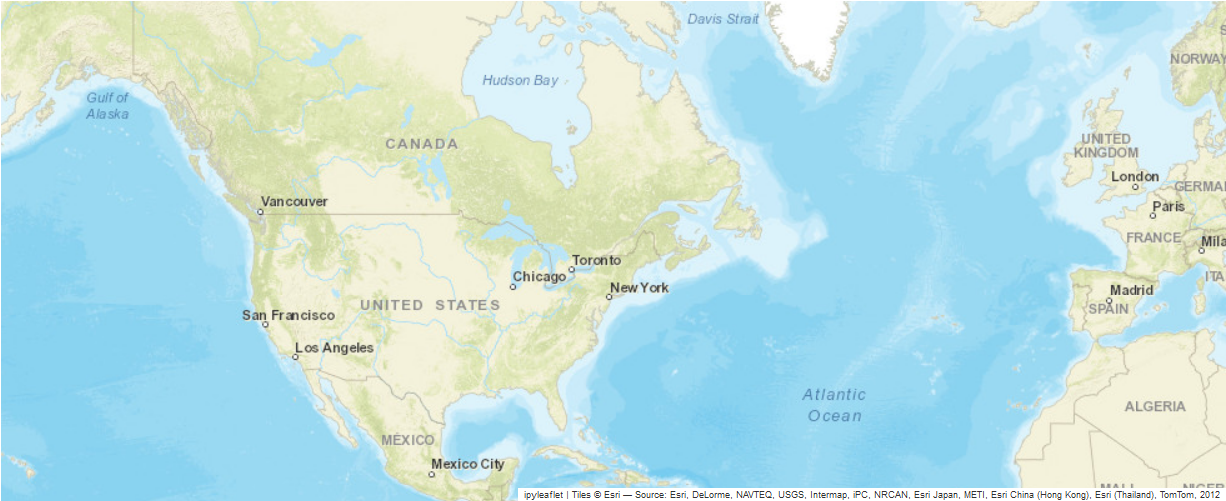

### Image Search Logic

In-order to develop a robust interactive experience, we have to develop a set of logic to catch a variety of different conditions and search parameters. This can look complicated from first glance, however, much of the function definition is executing the same EODMS search function that we had developed at the start of the tutorial. 

In [19]:
# search logic function 
from ipyleaflet import Popup
from IPython.display import clear_output

# function with inputs of if the search or draw was used, and relavent search parameters for EODMS
def image_map_search(search_bool, draw_bool, collections, filters = {}, dates = [], max_num = 1):
    
    file = open('credentials.txt')
    temp = file.read().splitlines()
    
    # clearing previous image and geometry layers (popups, pins, etc) on map
    for i in range(len(m.layers[2:])): 
        m.remove_layer(m.layers[-1])
    
    # checking if both radarsat-1 & rcm were active in collections radio widget, and performing search required amount of times
    if len(collections) == 1:
        search_conditions(search_bool, draw_bool, collections[0], filters, dates = dates, max_num = 1)
        
    elif len(collections) == 2: 
        search_conditions(search_bool, draw_bool, collections[0], filters[0], dates = dates, max_num = 1)
        search_conditions(search_bool, draw_bool, collections[1], filters[1], dates = dates, max_num = 1)

    # clearing drawn polygons
    draw_control.clear()
    # clearing drawn geometry
    feature_collection['features'].clear()

        
def search_conditions(search_bool, draw_bool, collection, filters = {}, dates = [], max_num = 1):    
    # search process if location search was used
    if search_bool[0] and not draw_bool[0]: 
        # formatting geometry for EODMS search
        search_geo = [('intersects', {'type': 'Point', 'coordinates': [search_location[0][1], search_location[0][0]]})]
        print('Image Search Using Searched Location')

        # executing EODMS search
        results = eodms_search(temp[0], temp[1], collection, search_geo, filters = filters, dates = dates, max_results = max_num)
        bounds = image_bounds(results)
        
        if len(results) == 0:
            print('\nNo Satellite Images Were Found')
            return -1

        # for the amount of results returned
        for j in range(len(results)):
            
            # formatting metadata for image display
            info, url = format_meta_display(collection, results[j])
            
            # creation of new image layer of satellite imagery
            image = ImageOverlay(
                url = url,
                bounds = (bounds[j]['SW'], bounds[j]['NE']),
                name = collection + ' ' + str(j + 1)
            )

            m.add_layer(image)
            
            # marker to display popup metadata about the displayed imagery
            marker = Marker(location = bounds[j]['NE'], icon=AwesomeIcon(name="info", marker_color='darkblue', icon_color='white'),\
                  draggable=False, name=(collection + ' Info ' + str(j + 1)))
            m.add_layer(marker)
            # formatted metadata for the popup when clicked
            marker.popup = info

        return 0

    # search process if drawn geometry was used
    elif draw_bool[0] and not search_bool[0]: 
        draw_geo = []
        # selecting geometry from drawn features
        for i in range(len(feature_collection['features'])):
            temp_geo = [('intersects', feature_collection['features'][i]['geometry'])]
            draw_geo.append(temp_geo)
        print('Image Search Using Drawn Location')

        for i in range(len(draw_geo)):
            # executing EODMS search
            results = eodms_search(temp[0], temp[1], collection, draw_geo[i], filters = filters, dates = dates, max_results = max_num)
            bounds = image_bounds(results) 

            try: results
            # catch if the same geometry was used but cleared 
            except NameError: 
                print('\nPlease Use New Geometry or Retry Geometry')
                return -1

            if len(results) == 0:
                print('\nNo Satellite Images Were Found')
                return -1

            for j in range(len(results)):
                info, url = format_meta_display(collection, results[j])
                
                image = ImageOverlay(
                    url = url,
                    bounds = (bounds[j]['SW'], bounds[j]['NE']),
                    name = collection + ' ' + str(i) + '-' + str(j)
                )

                m.add_layer(image)
                
                marker = Marker(location = bounds[j]['NE'], icon=AwesomeIcon(name="info", marker_color='darkblue', icon_color='white'),\
                      draggable=False, name=(collection + ' Info ' + str(i) + '-' + str(j)))
                m.add_layer(marker)
                                
                marker.popup = info
                
        return 0 

    # catch for other errors or conditions 
    else:
        print('Searchable Geometry was not Provided or an Error Occured')
        return -1


### Search Button 

With the search criteria developed, we will create our final widget being a search button to execute the above search criteria. 

In [20]:
# function to execute the search criteria when the search button is clicked
def execute_search(obj):
    # clears console prints
    clear_output()
    # redisplays the map and widgets
    display(m)  
    display(tab_nest)

    # formats the daterange slider for use in EODMS search
    date_range = format_date_range()
    
    # conditions for which collection is selected, calls function to create filter dictionary, and calls the search criteria
    if search_collection.value == 'Radarsat-1':
        rad_filter_dict = rad_filter_togs()
        image_map_search(search_bool, draw_bool, ['Radarsat1'], filters = rad_filter_dict, dates = date_range, max_num = 1)

    elif search_collection.value == 'RCM Images':
        rcm_filter_dict = rcm_filter_togs()
        image_map_search(search_bool, draw_bool, ['RCMImageProducts'], filters = rcm_filter_dict, dates = date_range, max_num = 1)

    elif search_collection.value == 'Radarsat-1 & RCM':
        rad_filter_dict = rad_filter_togs()
        rcm_filter_dict = rcm_filter_togs()
        image_map_search(search_bool, draw_bool, ['Radarsat1', 'RCMImageProducts'], filters = [rad_filter_dict, rcm_filter_dict],\
                         dates = date_range, max_num = 1)

    # updates image list for image opacity slider 
    update_image_list() 
    print('Image Search Complete')

# creation of search button widget
search_button = widgets.Button(description = "Search")
    
# executes the above function when the button is clicked
search_button.on_click(execute_search)

### Combination of Widgets
The developed search associated widgets will be put in an app layout template. This is similar to the grid layout used previously, with different styling in terms of sizing. 

In [21]:
from ipywidgets import AppLayout, Layout

search_layout = AppLayout(header=None,
          left_sidebar=search_button,
          center=search_collection,
          right_sidebar=image_opacity,
          footer=selection_range_slider,
          pane_widths=[1, 2, 2])

#### Tab Layout
With all of the buttons developed, we will combine them in a tab layout. This will allow us to switch between the different filter options available. 

In [22]:
tab_nest = widgets.Tab()
tab_nest.children = [search_layout, radsat_filters, rcm_filters]
tab_nest.set_title(0, 'Search Tab')
tab_nest.set_title(1, 'Radarsat-1 Filters')
tab_nest.set_title(2, 'RCM Image Filters')

### Map Creation

Finally, we will construct the map that we will use to display the satellite imagery. An important element of this map will be extracted geospatial information to use in the search criteria in EODMS. We will look to develop two options for generating geospatial search criteria, either through the use of a search bar, or through drawing markers and polygons on the map itself. 

In [23]:
from ipyleaflet import basemaps, Map, SearchControl, ZoomControl, DrawControl,\
FullScreenControl, Marker, AwesomeIcon, LayersControl

# creation of map with specified center and basemap, zoom controsl set to false to reposition it later on
center = [45.520261, -73.393618]
m = Map(basemap=basemaps.Esri.WorldStreetMap, center=center, zoom=3, zoom_control=False)

# adding fullscreen and zoom controls to map
m.add_control(FullScreenControl(position='topright'))
m.add_control(ZoomControl(position='topleft'))

# setting a marker for the Canadian Space Agency Headquarters in Saint-Hubert
headquarters = Marker(location = center, icon=AwesomeIcon(name="space-shuttle", marker_color='darkblue', icon_color='white'), draggable=False,\
                     name='Headquarters')

m.add_layer(headquarters);

# marker style to display when a searched location is found
marker = Marker(icon=AwesomeIcon(name="globe", marker_color='green', icon_color='darkgreen'), draggable=False)

search = SearchControl(
    position = "topleft",
    url = 'https://nominatim.openstreetmap.org/search?format=json&q={s}?',
    zoom = 10,
    marker = marker
)

m.add_control(search)

# list for if location search or drawn geometry is used
search_bool = [{}]
draw_bool = [{}]

search_location = [{}]

# function to execute when the location search with input of variable unpackable dictionary item from the loaction search
def on_found(**kwargs):
    # coodinates of searched location
    search_location[0] = kwargs['location']
    # logic to set that location search was used
    search_bool[0] = True
    draw_bool[0] = False
    # clears previously drawn features
    draw_control.clear()
    feature_collection['features'].clear()
    marker.visible = True

search.on_location_found(on_found)



draw_control = DrawControl(
position = 'bottomleft'
)

# drawn features dictionary in geojson foramt
feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}


def handle_draw(self, action, geo_json):
    # updates the drawn geometry list
    feature_collection['features'].append(geo_json)
    # updates the search logic
    search_bool[0] = False
    draw_bool[0] = True
    marker.visible = False

# executes function following drawing
draw_control.on_draw(handle_draw)

m.add_control(draw_control)

# adds controls to choose which layers to display
layers_control = LayersControl(position='bottomright')
m.add_control(layers_control)

The last step now is to display the map and the available widgets that we created! Now is your chance to explore and search available satellite imagery. 

In [24]:
display(m)  
display(tab_nest)

Map(center=[45.520261, -73.393618], controls=(AttributionControl(options=['position', 'prefix'], position='bot…

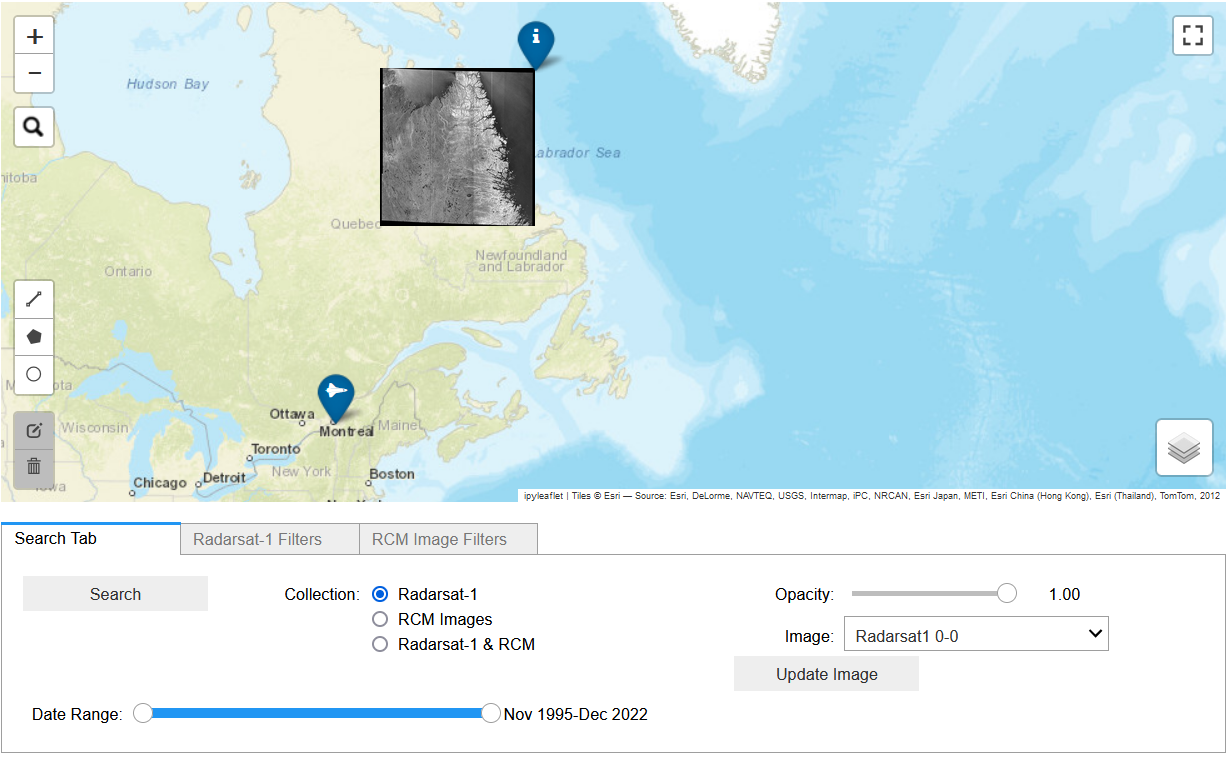